# API pull

In [29]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [31]:
type(data)


dict

In [33]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [35]:
pd.json_normalize(data['data'])


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971931e+07,1.971931e+07,False,NaN,1,NaN,NaN,None,2024-07-02T17:53:00.000Z,61991.259157,2.193008e+10,-14.2971,0.239196,-2.442639,0.660262,-8.667017,0.227170,-6.150977,1.222425e+12,53.3259,1.301816e+12,None,2024-07-02T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201914e+08,1.201914e+08,True,NaN,2,NaN,NaN,None,2024-07-02T17:52:00.000Z,3416.299991,1.032313e+10,-15.0234,0.131537,-1.868183,0.694257,-9.431194,10.788638,2.665624,4.106100e+11,17.9139,4.106100e+11,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,90753,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.127873e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-02T17:52:00.000Z,0.998488,4.117509e+10,-11.4009,-0.030642,-0.034056,-0.138988,-0.103711,-0.185993,-0.172080,1.126168e+11,4.9132,1.159013e+11,None,2024-07-02T17:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,None,2024-07-02T17:52:00.000Z,576.169522,1.512388e+09,-11.1287,0.282589,-0.777320,0.272581,-3.652022,-0.955826,3.866336,8.503287e+10,3.7098,8.503287e+10,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,697,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.627786e+08,5.793824e+08,True,NaN,5,NaN,NaN,None,2024-07-02T17:52:00.000Z,149.348281,1.726833e+09,-11.0855,0.487354,1.124540,8.561137,-8.075497,5.043689,-20.644601,6.911519e+10,3.0153,8.652976e+10,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USDC,USDC,usd-coin,20681,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.243619e+10,3.243619e+10,False,NaN,6,NaN,NaN,None,2024-07-02T17:52:00.000Z,0.999837,4.281969e+09,-9.1744,-0.013463,-0.009607,-0.044184,-0.031760,-0.019720,-0.009743,3.243089e+10,1.4149,3.243089e+10,None,2024-07-02T17:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,52,XRP,XRP,xrp,1346,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-07-02T17:53:00.000Z,0.481630,8.642920e+08,6.7331,-0.078558,0.654709,0.977444,-6.177048,-8.747950,-16.933880,2.682114e+10,1.1701,4.816295e+10,None,2024-07-02T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN
7,11419,Toncoin,TON,toncoin,449,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.460080e+09,5.108427e+09,True,NaN,8,3.414167e+09,2.748355e+10,None,2024-07-02T17:52:00.000Z,8.049855,2.988445e+08,61.0323,0.232976,4.549997,7.599209,22.164870,43.928683,60.614615,1.980329e+10,0.8640,4.112209e+10,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,1017,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.449521e+11,1.449521e+11,True,NaN,9,NaN,NaN,None,2024-07-02T17:53:00.000Z,0.123122,3.960200e+08,-15.4059,0.106608,-1.879529,-2.583526,-21.244353,-12.351740,-30.793848,1.784675e+10,0.7786,1.784675e+10,None,2024-07-02T1

In [37]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971931e+07,1.971931e+07,False,NaN,1,NaN,NaN,None,2024-07-02T17:53:00.000Z,61991.259157,2.193008e+10,-14.2971,0.239196,-2.442639,0.660262,-8.667017,0.227170,-6.150977,1.222425e+12,53.3259,1.301816e+12,None,2024-07-02T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201914e+08,1.201914e+08,True,NaN,2,NaN,NaN,None,2024-07-02T17:52:00.000Z,3416.299991,1.032313e+10,-15.0234,0.131537,-1.868183,0.694257,-9.431194,10.788638,2.665624,4.106100e+11,17.9139,4.106100e+11,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461
2,825,Tether USDt,USDT,tether,90753,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.127873e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-02T17:52:00.000Z,0.998488,4.117509e+10,-11.4009,-0.030642,-0.034056,-0.138988,-0.103711,-0.185993,-0.172080,1.126168e+11,4.9132,1.159013e+11,None,2024-07-02T17:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 11:54:19.261461
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,None,2024-07-02T17:52:00.000Z,576.169522,1.512388e+09,-11.1287,0.282589,-0.777320,0.272581,-3.652022,-0.955826,3.866336,8.503287e+10,3.7098,8.503287e+10,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461
4,5426,Solana,SOL,solana,697,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.627786e+08,5.793824e+08,True,NaN,5,NaN,NaN,None,2024-07-02T17:52:00.000Z,149.348281,1.726833e+09,-11.0855,0.487354,1.124540,8.561137,-8.075497,5.043689,-20.644601,6.911519e+10,3.0153,8.652976e+10,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461
5,3408,USDC,USDC,usd-coin,20681,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.243619e+10,3.243619e+10,False,NaN,6,NaN,NaN,None,2024-07-02T17:52:00.000Z,0.999837,4.281969e+09,-9.1744,-0.013463,-0.009607,-0.044184,-0.031760,-0.019720,-0.009743,3.243089e+10,1.4149,3.243089e+10,None,2024-07-02T17:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-02 11:54:19.261461
6,52,XRP,XRP,xrp,1346,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-07-02T17:53:00.000Z,0.481630,8.642920e+08,6.7331,-0.078558,0.654709,0.977444,-6.177048,-8.747950,-16.933880,2.682114e+10,1.1701,4.816295e+10,None,2024-07-02T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461
7,11419,Toncoin,TON,toncoin,449,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.460080e+09,5.108427e+09,True,NaN,8,3.414167e+09,2.748355e+10,None,2024-07-02T17:52:00.000Z,8.049855,2.988445e+08,61.0323,0.232976,4.549997,7.599209,22.164870,43.928683,60.614615,1.980329e+10,0.8640,4.112209e+10,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461
8,74,Dogecoin,DOGE,dogecoin,1017,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me.

In [58]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])

In [60]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()


API Runner completed
API Runner completed


KeyboardInterrupt: 

In [62]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.971931e+07,1.971931e+07,False,NaN,1,NaN,NaN,None,2024-07-02T17:53:00.000Z,61991.259157,2.193008e+10,-14.2971,0.239196,-2.442639,0.660262,-8.667017,0.227170,-6.150977,1.222425e+12,53.3259,1.301816e+12,None,2024-07-02T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461,NaT
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201914e+08,1.201914e+08,True,NaN,2,NaN,NaN,None,2024-07-02T17:52:00.000Z,3416.299991,1.032313e+10,-15.0234,0.131537,-1.868183,0.694257,-9.431194,10.788638,2.665624,4.106100e+11,17.9139,4.106100e+11,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461,NaT
2,825,Tether USDt,USDT,tether,90753,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.127873e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-02T17:52:00.000Z,0.998488,4.117509e+10,-11.4009,-0.030642,-0.034056,-0.138988,-0.103711,-0.185993,-0.172080,1.126168e+11,4.9132,1.159013e+11,None,2024-07-02T17:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 11:54:19.261461,NaT
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,None,2024-07-02T17:52:00.000Z,576.169522,1.512388e+09,-11.1287,0.282589,-0.777320,0.272581,-3.652022,-0.955826,3.866336,8.503287e+10,3.7098,8.503287e+10,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461,NaT
4,5426,Solana,SOL,solana,697,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.627786e+08,5.793824e+08,True,NaN,5,NaN,NaN,None,2024-07-02T17:52:00.000Z,149.348281,1.726833e+09,-11.0855,0.487354,1.124540,8.561137,-8.075497,5.043689,-20.644601,6.911519e+10,3.0153,8.652976e+10,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,5805,Avalanche,AVAX,avalanche,750,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.0,3.941765e+08,4.435228e+08,False,NaN,11,NaN,NaN,None,2024-07-02T18:07:00.000Z,28.492740,2.609838e+08,-20.4832,0.994513,-4.415635,12.696306,-18.427898,-19.460529,-37.591322,1.123117e+10,0.4891,2.039364e+10,None,2024-07-02T18:07:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2024-07-02 12:09:43.882069
11,1958,TRON,TRX,tron,998,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.718630e+10,8.718634e+10,True,NaN,12,7.165966e+10,9.223389e+09,None,2024-07-02T18:07:00.000Z,0.128711,2.343513e+08,-10.8876,0.131158,0.168318,6.101162,12.798802,4.205029,9.919958,1.122184e+10,0.4889,1.122184e+10,None,2024-07-02T18:07:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2024-07-02 12:09:43.882069
12,5994,Shiba Inu,SHIB,shiba-inu,841,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,5.892709e+14,5.895194e+14,False,NaN,13,NaN,NaN,None,2024-07-02T18:07:00.000Z,0.000017,1.559273e+08,-24.5889,0.576102,-1.084784,-4.204670,-29.185794,-28.739638,-34.896527,1.007002e+10,0.4385,1.007427e+10,None,2024-07-02T18:07:0

In [66]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19719306.00000,19719306.00000,False,NaN,1,NaN,NaN,None,2024-07-02T17:53:00.000Z,61991.25916,21930083487.51624,-14.29710,0.23920,-2.44264,0.66026,-8.66702,0.22717,-6.15098,1222424608638.45801,53.32590,1301816442293.03003,None,2024-07-02T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461,NaT
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120191423.45771,120191423.45771,True,NaN,2,NaN,NaN,None,2024-07-02T17:52:00.000Z,3416.29999,10323128681.21235,-15.02340,0.13154,-1.86818,0.69426,-9.43119,10.78864,2.66562,410609958829.26355,17.91390,410609958829.26001,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461,NaT
2,825,Tether USDt,USDT,tether,90753,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112787335849.36160,116076856617.66272,True,NaN,3,NaN,NaN,None,2024-07-02T17:52:00.000Z,0.99849,41175085175.14944,-11.40090,-0.03064,-0.03406,-0.13899,-0.10371,-0.18599,-0.17208,112616761103.78027,4.91320,115901306941.48000,None,2024-07-02T17:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 11:54:19.261461,NaT
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583077.38025,147583077.38025,False,NaN,4,NaN,NaN,None,2024-07-02T17:52:00.000Z,576.16952,1512387851.92029,-11.12870,0.28259,-0.77732,0.27258,-3.65202,-0.95583,3.86634,85032871118.44672,3.70980,85032871118.45000,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461,NaT
4,5426,Solana,SOL,solana,697,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462778636.72021,579382365.59316,True,NaN,5,NaN,NaN,None,2024-07-02T17:52:00.000Z,149.34828,1726833243.47734,-11.08550,0.48735,1.12454,8.56114,-8.07550,5.04369,-20.64460,69115193968.03087,3.01530,86529760456.16000,None,2024-07-02T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 11:54:19.261461,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,5805,Avalanche,AVAX,avalanche,750,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.00000,394176452.40892,443522822.40892,False,NaN,11,NaN,NaN,None,2024-07-02T18:07:00.000Z,28.49274,260983753.44746,-20.48320,0.99451,-4.41564,12.69631,-18.42790,-19.46053,-37.59132,11231167074.71214,0.48910,20393641978.04000,None,2024-07-02T18:07:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2024-07-02 12:09:43.882069
11,1958,TRON,TRX,tron,998,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,87186295047.35008,87186337626.52754,True,NaN,12,71659659264.00000,9223388777.53305,None,2024-07-02T18:07:00.000Z,0.12871,234351254.75045,-10.88760,0.13116,0.16832,6.10116,12.79880,4.20503,9.91996,11221838110.22389,0.48890,11221843590.63000,None,2024-07-02T18:07:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2024-07-02 12:09:43.882069
12,5994,Shiba Inu,SHIB,shiba-inu,841,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,589270901748116.62500,589519357950127.75000,False,NaN,13,NaN,NaN,None,2024-07-02T18

In [68]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.40037,-2.32271,1.14024,-8.17779,0.43884,-5.75077
Ethereum,0.31468,-1.90234,0.95592,-8.93560,11.04173,3.00857
Tether USDt,-0.00289,-0.01314,-0.10703,-0.09084,-0.16490,-0.16972
BNB,0.27655,-0.83430,0.38579,-3.40580,-0.76529,4.06123
Solana,0.83802,1.32660,9.34188,-7.22178,5.54265,-19.96289
USDC,0.00528,-0.00110,-0.01595,-0.01927,-0.00722,-0.00451
XRP,0.03961,0.71763,1.17652,-5.56201,-8.71494,-16.74314
Toncoin,0.30247,4.49495,8.00802,22.77409,42.62108,61.47203
Dogecoin,0.29125,-1.93826,-2.38214,-20.55764,-12.19811,-30.34596


In [70]:
df4 = df3.stack()
df4
type(df4)
df5 = df4.to_frame(name='values')
df5
df5.count()

values    90
dtype: int64

In [72]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"


,values
0,0.40037
1,-2.32271
2,1.14024
3,-8.17779
4,0.43884
...,...
85,-0.22583
86,2.93348
87,-20.44375
88,3.63583


In [83]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7


,values
0,0.40037
1,-2.32271
2,1.14024
3,-8.17779
4,0.43884
...,...
85,-0.22583
86,2.93348
87,-20.44375
88,3.63583


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:



# Assuming 'percent_change' is a valid column name in the DataFrame 'df7'
# Check the column names in the DataFrame to ensure 'percent_change' exists
print(df7.columns)

# If 'percent_change' is not found in the columns, you may need to use the correct column name or modify the DataFrame accordingly.
# Assuming the correct column name is 'percentage_change', the code would be:
sns.catplot(x='percentage_change', y='values', hue='name', data=df7, kind='point')

Index(['values'], dtype='object')


ValueError: Could not interpret input 'percentage_change'

In [95]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,61991.25916,2024-07-02 11:54:19.261461
15,Bitcoin,62115.44129,NaT
30,Bitcoin,62147.01326,NaT
45,Bitcoin,62169.73781,NaT
60,Bitcoin,62198.21152,NaT


C:\Users\saihg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saihg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

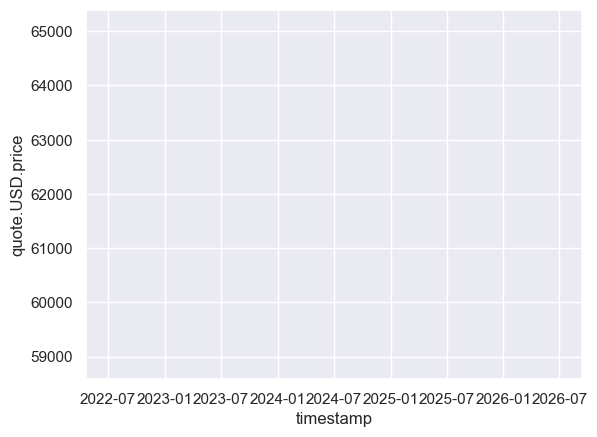

In [97]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)